In [32]:
import torch
import matplotlib.pyplot as plt

example vectors

In [33]:
vector1 = torch.tensor([2, 2]).float()
vector2 = torch.tensor([0, 3]).float()

vector1_normalized = vector1 / torch.norm(vector1)
vector2_normalized = vector2 / torch.norm(vector2)

In [34]:
torch.norm(vector1), torch.norm(vector2)

(tensor(2.8284), tensor(3.))

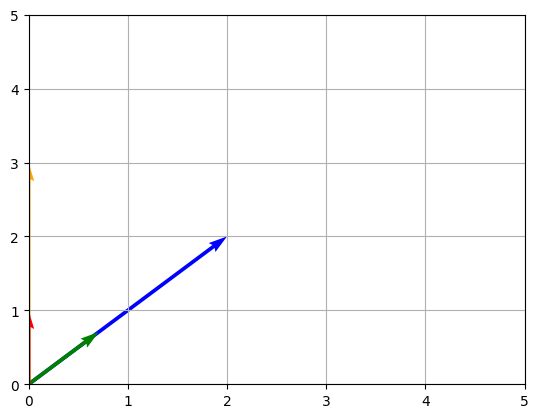

In [35]:
#plot the vectors
plt.quiver(0, 0, vector1[0], vector1[1], scale=1, angles="xy", scale_units="xy",color='blue')
plt.quiver(0, 0, vector2[0], vector2[1], scale=1, angles="xy", scale_units="xy", color='orange')

#plot the normalized vectors
plt.quiver(0, 0, vector1_normalized[0], vector1_normalized[1], scale=1, angles="xy", scale_units="xy",color='green')
plt.quiver(0, 0, vector2_normalized[0], vector2_normalized[1], scale=1, angles="xy", scale_units="xy", color='red')

plt.ylim(0, 5)
plt.xlim(0, 5)
plt.grid()


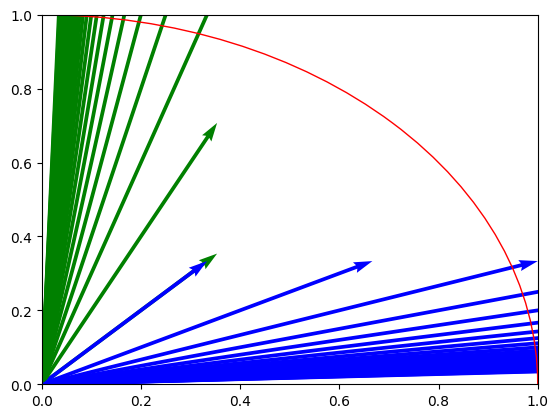

In [36]:
for i in range(1,30):
    vector1_ = torch.tensor([1,i]).float()
    vector2_ = torch.tensor([i,1]).float()
    vector1_normalized_ = vector1_ / torch.norm(vector1)
    vector2_normalized_ = vector2_ / torch.norm(vector2)


    plt.quiver(0, 0, vector1_normalized_[0], vector1_normalized_[1], scale=1, angles="xy", scale_units="xy",color='green')
    plt.quiver(0, 0, vector2_normalized_[0], vector2_normalized_[1], scale=1, angles="xy", scale_units="xy", color='blue')

plt.xlim(0, 1)
plt.ylim(0, 1)

#draw a circle with radius 1
circle1 = plt.Circle((0, 0), 1, color='r', fill=False)
plt.gcf().gca().add_artist(circle1)


In [37]:
cosine_similarity1= vector1 @ vector2 / (torch.norm(vector1) * torch.norm(vector2))
cosine_similarity2 = vector1_normalized @ vector2_normalized

cosine_similarity1, cosine_similarity2

(tensor(0.7071), tensor(0.7071))

In [38]:
torch.sum(vector1_normalized * vector2_normalized)

tensor(0.7071)

cuando x es un vector unitario:

$$
||\frac{x}{||x||}|| = \frac{1}{||x||}||x|| = 1
$$

$$
1 = \sqrt{1} = \sqrt{\frac{x}{||x||} \cdot \frac{x}{||x||}} = \sqrt{\frac{x \cdot x}{||x|| \cdot ||x||}} = \sqrt{\frac{x \cdot x}{||x||^2}} = \sqrt{\frac{||x||^2}{||x||^2}}
$$

el producto punto de un vector unitario por si mismo es igual a la norma al cuadrado del vector

el producto punto entre dos vectores, geometricamente tambien se puede de esta forma:

$$
x \cdot y = ||x|| \cdot ||y|| \cdot cos(\theta)
$$

In [55]:
vector1 @ vector2, torch.norm(vector1) * torch.norm(vector2) * cosine_similarity1

(tensor(6.), tensor(6.))

los vectores no tienen que estar normalizados! y sirve para n dimensiones

In [68]:
vector1 = torch.tensor([2, 2,5,6,7,8,9,10,3,324,6,345,3]).float()
vector2 = torch.tensor([0, 3,5,6,7,8,9,10,324,5,3,3,67]).float()

print(f"vector con {vector1.shape[0]} dimensiones")

cosine_similarity1 = vector1 @ vector2 / (torch.norm(vector1) * torch.norm(vector2))

vector1 @ vector2, torch.norm(vector1) * torch.norm(vector2) * cosine_similarity1

vector con 13 dimensiones


(tensor(4207.), tensor(4207.))

self-attention

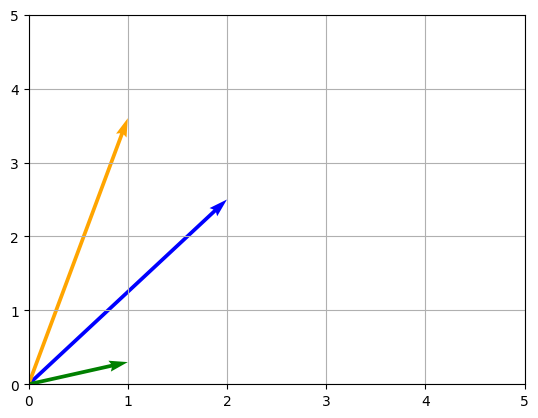

In [86]:
vector1 = torch.tensor([2,2.5])
vector2 = torch.tensor([1,3.6])
vector3 = torch.tensor([1,0.3])

#plot
plt.quiver(0, 0, vector1[0], vector1[1], scale=1, angles="xy", scale_units="xy",color='blue')
plt.quiver(0, 0, vector2[0], vector2[1], scale=1, angles="xy", scale_units="xy", color='orange')
plt.quiver(0, 0, vector3[0], vector3[1], scale=1, angles="xy", scale_units="xy", color='green')

plt.ylim(0, 5)
plt.xlim(0, 5)
plt.grid()

In [87]:
X = torch.stack([vector1, vector2, vector3]).float()

X, X.T, X.shape

(tensor([[2.0000, 2.5000],
         [1.0000, 3.6000],
         [1.0000, 0.3000]]),
 tensor([[2.0000, 1.0000, 1.0000],
         [2.5000, 3.6000, 0.3000]]),
 torch.Size([3, 2]))

In [88]:
X @ X.T

tensor([[10.2500, 11.0000,  2.7500],
        [11.0000, 13.9600,  2.0800],
        [ 2.7500,  2.0800,  1.0900]])

$$
A = softmax(X \cdot X^T) \cdot X
$$

In [89]:
A = torch.softmax(X @ X.T, dim=1)
A

tensor([[3.2076e-01, 6.7906e-01, 1.7741e-04],
        [4.9266e-02, 9.5073e-01, 6.5862e-06],
        [5.8760e-01, 3.0068e-01, 1.1173e-01]])

In [90]:
Y = A @ X
Y

tensor([[1.3208, 3.2466],
        [1.0493, 3.5458],
        [1.5876, 2.5850]])

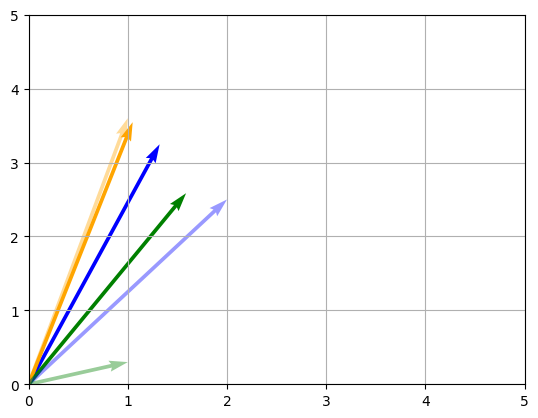

In [94]:
#plot the vectors in Y matrix
plt.quiver(0, 0, Y[0,0], Y[0,1], scale=1, angles="xy", scale_units="xy",color='blue')
plt.quiver(0, 0, Y[1,0], Y[1,1], scale=1, angles="xy", scale_units="xy", color='orange')
plt.quiver(0, 0, Y[2,0], Y[2,1], scale=1, angles="xy", scale_units="xy", color='green')

#plot vectors in X matrix
plt.quiver(0, 0, X[0,0], X[0,1], scale=1, angles="xy", scale_units="xy",color='blue', alpha=0.4)
plt.quiver(0, 0, X[1,0], X[1,1], scale=1, angles="xy", scale_units="xy", color='orange', alpha=0.4)
plt.quiver(0, 0, X[2,0], X[2,1], scale=1, angles="xy", scale_units="xy", color='green', alpha=0.4)

plt.ylim(0, 5)
plt.xlim(0, 5)
plt.grid()

la formula propuesta es:

$$
Attention(Q, K, V) = softmax(\frac{Q \cdot K^T}{\sqrt{d_k}}) \cdot V
$$
$$
Q = W_Q \cdot X \quad K = W_K \cdot X \quad V = W_V \cdot X
$$